# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

today = pd.Timestamp.today().strftime('%Y-%m-%d')

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date_unformatted = city_weather['dt']
        city_date_struct = time.localtime(city_date_unformatted)
        city_date = time.strftime('%Y-%m-%d', city_date_struct)

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | okha
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | fuerte olimpo
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | sandnessjoen
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | houma
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | uusikaupunki
Processing Record 18 of Set 1 | vilyuchinsk
Processing Record 19 of Set 1 | espargos
City not found. Skipping...
Processing Record 20 of Set 1 | lembar
City not found. Skipping...
Processing Record 21 of Set 1 | pand

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
print(city_data_df)

                  City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        blackmans bay -43.0167  147.3167     22.07        48           7   
1       guerrero negro  27.9769 -114.0611     13.99        69           0   
2                 okha  53.5739  142.9478    -13.02        95         100   
3            grytviken -54.2811  -36.5092      4.66        65          83   
4    port-aux-francais -49.3500   70.2167      6.93        90         100   
..                 ...      ...       ...       ...       ...         ...   
568            kodinsk  58.6881   99.1844    -36.44       100          34   
569             madera  37.1666 -119.8343     13.97        62           4   
570             nabire  -3.3667  135.4833     29.62        69         100   
571      villa bruzual   9.3328  -69.1208     27.13        60          87   
572             oamaru -45.0784  170.9801     16.98        69          12   

     Wind Speed Country        Date  
0          0.89      AU  2025-01-30  

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,22.07,48,7,0.89,AU,2025-01-30
1,guerrero negro,27.9769,-114.0611,13.99,69,0,7.15,MX,2025-01-30
2,okha,53.5739,142.9478,-13.02,95,100,6.95,RU,2025-01-30
3,grytviken,-54.2811,-36.5092,4.66,65,83,3.89,GS,2025-01-30
4,port-aux-francais,-49.3500,70.2167,6.93,90,100,16.39,TF,2025-01-30


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,22.07,48,7,0.89,AU,2025-01-30
1,guerrero negro,27.9769,-114.0611,13.99,69,0,7.15,MX,2025-01-30
2,okha,53.5739,142.9478,-13.02,95,100,6.95,RU,2025-01-30
3,grytviken,-54.2811,-36.5092,4.66,65,83,3.89,GS,2025-01-30
4,port-aux-francais,-49.3500,70.2167,6.93,90,100,16.39,TF,2025-01-30


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

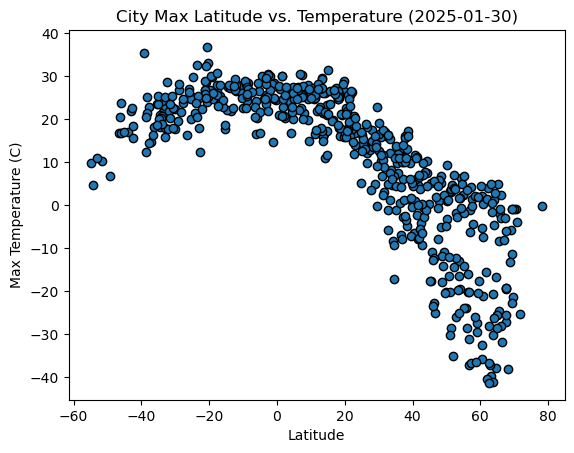

In [13]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_axis,y_axis, edgecolors='black')
plt.title(f"City Max Latitude vs. Temperature ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

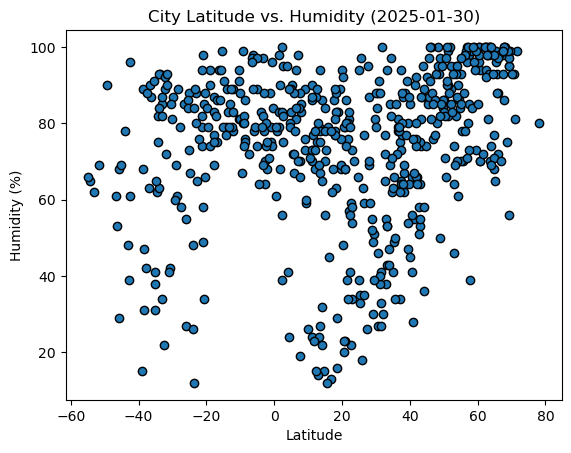

In [14]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_axis,y_axis, edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

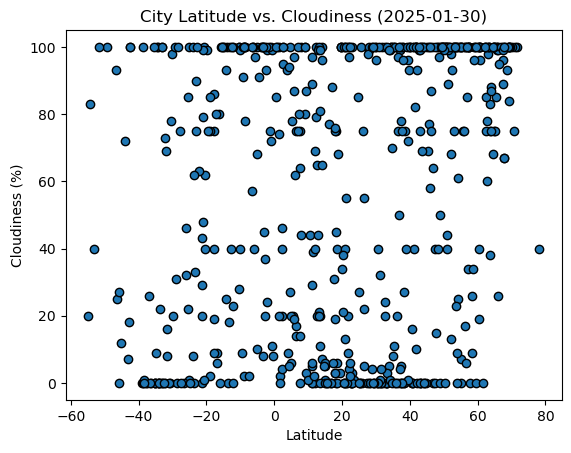

In [15]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_axis,y_axis, edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

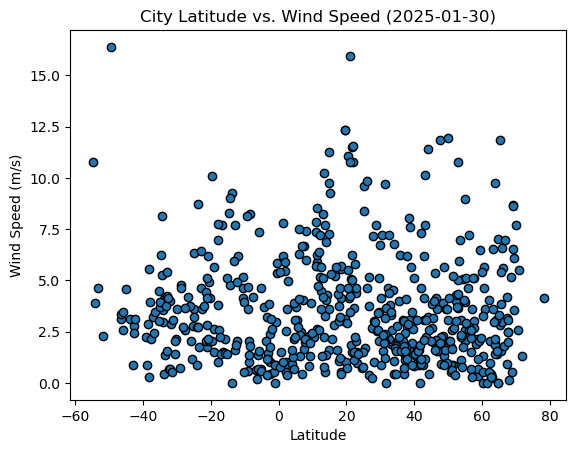

In [16]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_axis,y_axis, edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, titles, text_coordinates):
    #calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #plotting results
    plt.scatter(x, y)
    plt.title(f"Latitude vs {titles}")
    plt.xlabel("lattitude")
    plt.ylabel(titles)
    plt.plot(x, regression_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")
    print(f"The r-squared value is: {rvalue**2}")
    plt.show()


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,guerrero negro,27.9769,-114.0611,13.99,69,0,7.15,MX,2025-01-30
2,okha,53.5739,142.9478,-13.02,95,100,6.95,RU,2025-01-30
8,sandnessjoen,66.0217,12.6316,2.32,88,100,6.57,NO,2025-01-30
10,houma,29.5958,-90.7195,22.78,81,100,5.14,US,2025-01-30
11,ilulissat,69.2167,-51.1000,-11.31,56,84,6.51,GL,2025-01-30


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,22.07,48,7,0.89,AU,2025-01-30
3,grytviken,-54.2811,-36.5092,4.66,65,83,3.89,GS,2025-01-30
4,port-aux-francais,-49.3500,70.2167,6.93,90,100,16.39,TF,2025-01-30
5,port alfred,-33.5906,26.8910,21.77,93,22,1.34,ZA,2025-01-30
6,fuerte olimpo,-21.0415,-57.8738,28.79,58,79,1.76,PY,2025-01-30


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.6897375016299276


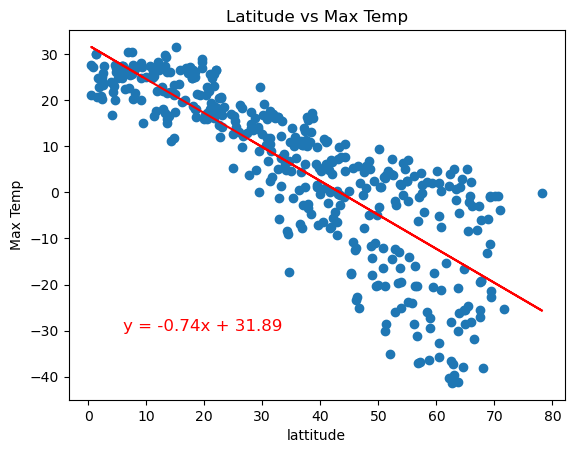

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, "Max Temp", (6,-30))

The r-squared value is: 0.29629189668666944


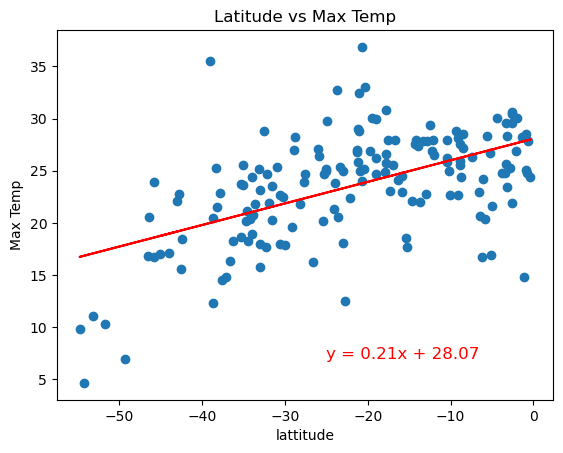

In [21]:
    # Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, "Max Temp", (-25,7))

**Discussion about the linear relationship:** 
The linear relationship between latitude (x-axis) and maximum temperature (y-axis) differs significantly between the Northern and Southern Hemispheres, as indicated by their respective R² values. The Northern Hemisphere shows a stronger correlation (R² = 0.69), suggesting that latitude is a reliable predictor of maximum temperature, likely due to its larger landmass and varied climate zones. In contrast, the Southern Hemisphere exhibits a weaker correlation (R² = 0.30), implying that factors beyond latitude—such as oceanic influences and fewer landmasses—play a more significant role in determining temperature variation.

Said differently, as you move further from the equator in both hemispheres, the maximum temperature generally decreases. This trend occurs because regions near the equator receive more direct sunlight year-round, leading to consistently higher temperatures. However, the strength of this relationship differs between the hemispheres:
    - Northern Hemisphere (R² = 0.69): There is a strong negative correlation between latitude and maximum temperature. As latitude increases (moving away from the equator), temperatures drop more predictably, likely due to the presence of large landmasses that experience significant seasonal variations.
    - Southern Hemisphere (R² = 0.30): The relationship between latitude and maximum temperature is weaker. While temperatures still decrease as you move away from the equator, the correlation is less pronounced, likely due to the moderating effect of vast oceanic regions, which stabilize temperature fluctuations.

Overall, both hemispheres experience a decline in maximum temperature with increasing latitude, but this effect is more consistent and pronounced in the Northern Hemisphere.


### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.1409000056899239


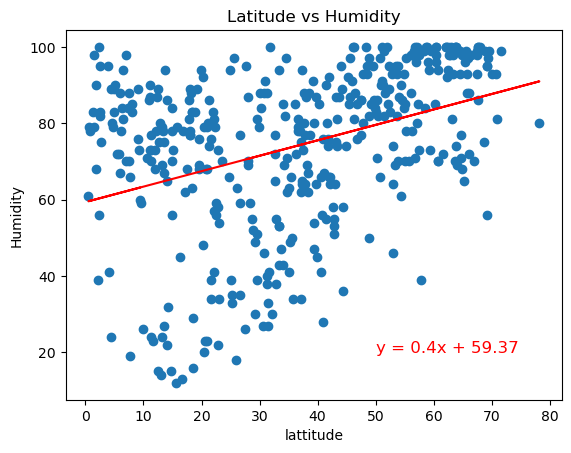

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Humidity"]

linear_regression(x_values, y_values, "Humidity", (50,20))

The r-squared value is: 0.1303343865778105


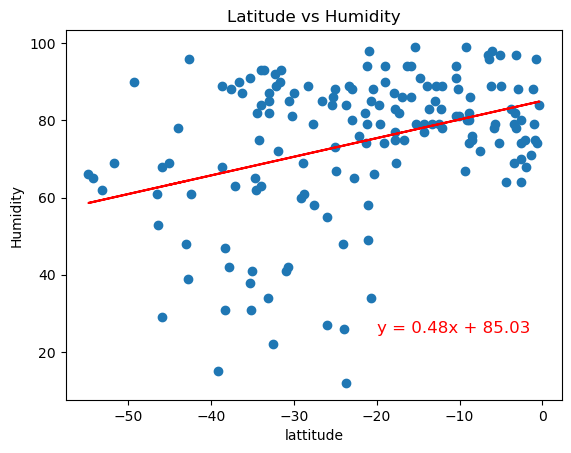

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Humidity"]

linear_regression(x_values, y_values, "Humidity", (-20,25))

**Discussion about the linear relationship:**
The linear relationship between latitude (x-axis) and humidity (y-axis) in both the Northern and Southern Hemispheres appears to be weak. The R-squared values—0.1409 for the Northern Hemisphere and 0.1303 for the Southern Hemisphere—indicate that only about 14% and 13% of the variation in humidity can be explained by latitude in each respective hemisphere. This suggests that while there may be a slight trend linking latitude to humidity, other factors such as local climate patterns, proximity to large water bodies, and atmospheric circulation likely play a more significant role in determining humidity levels. Overall, the low R-squared values indicate that latitude alone is not a strong predictor of humidity in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.11058606451815355


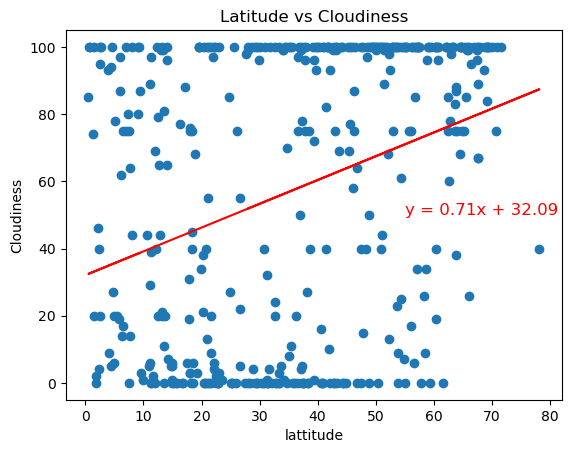

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, "Cloudiness", (55,50))

The r-squared value is: 0.08627820538599126


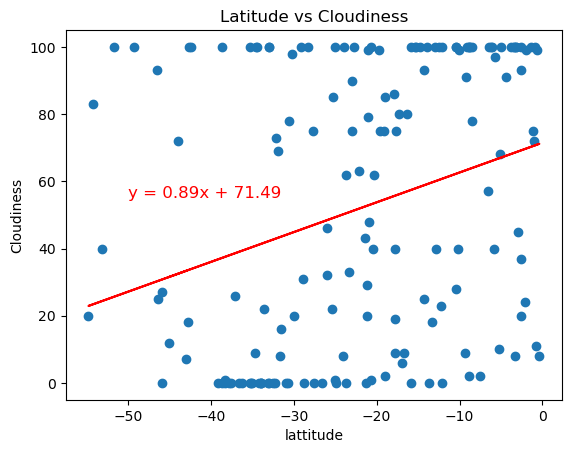

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, "Cloudiness", (-50,55))

**Discussion about the linear relationship:**
The linear relationship between latitude (x-axis) and cloudiness (y-axis) in both the Northern and Southern Hemispheres appears to be weak. The R-squared values—0.1106 for the Northern Hemisphere and 0.0863 for the Southern Hemisphere—indicate that latitude explains only about 11.1% and 8.6%, respectively, of the variability in cloudiness.

Since both R-squared values are relatively low, this suggests that latitude is not a strong predictor of cloudiness in either hemisphere. Other factors, such as atmospheric circulation patterns, local geography, and seasonal weather systems, likely play a more significant role in determining cloud cover. Additionally, the slightly higher R-squared value in the Northern Hemisphere suggests a marginally stronger relationship between latitude and cloudiness compared to the Southern Hemisphere, but the difference is minimal.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.012808791800834662


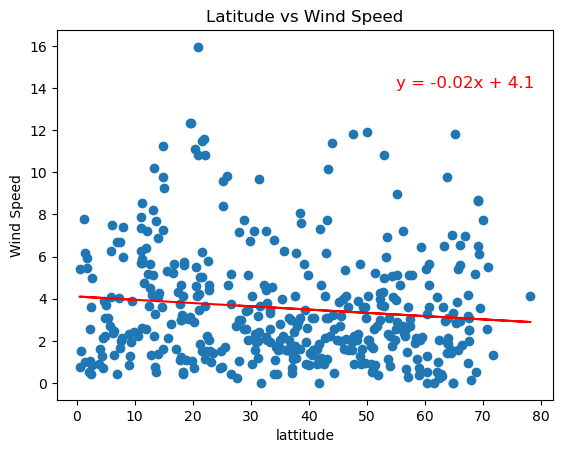

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, "Wind Speed", (55,14))

The r-squared value is: 0.027296828474542855


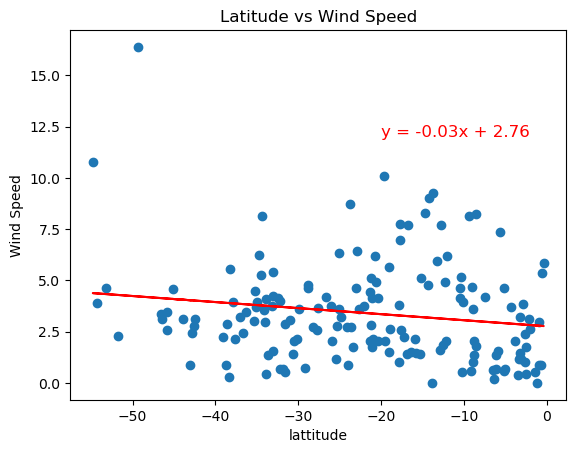

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, "Wind Speed", (-20,12))

**Discussion about the linear relationship:**
The linear relationship between latitude (x-axis) and wind speed (y-axis) in both the Northern and Southern Hemispheres appears to be very weak. The R-squared values for the Northern Hemisphere (0.0128) and the Southern Hemisphere (0.0273) indicate that latitude explains only about 1.3% and 2.7% of the variation in wind speed, respectively. These low R-squared values suggest that latitude alone is not a strong predictor of wind speed in either hemisphere. Other factors, such as atmospheric pressure systems, ocean currents, and local geography, likely have a more significant influence on wind speed variations. Additionally, the slightly higher R-squared value for the Southern Hemisphere suggests a marginally stronger (but still weak) relationship compared to the Northern Hemisphere.